# MSIN0114 Dissertation Project 

In [1]:
#Enabling multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import shape
from datetime import datetime, timedelta

#Visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
plt.style.use('ggplot')
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

#Other packages for data preprocessing
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import random
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve

# Data

### Importing the datasets:

We got the footfall_data_full from the main notebook that hasn't generated the synthetic data based on the uneven balance of footfall values. 

We did this to create a comparison for the models performance based on the effect of generating the synthetic data to balance the outcome variable and not. 

In [3]:
footfall_data_full = pd.read_csv("footfall_data_full.csv")

In [4]:
footfall_data_full

,Unnamed: 0,Interval,Zone_Id,Footfall,Temp,Weather,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,ProminentActivityInZone,Month,Hour,DayOfWeek
0,0,2023-04-28 00:00:00,Zone 10,1,11.0,Broken clouds,24.0,82.0,1015.0,8.000000,False,False,True,Leisure / Activites,April,0,Friday
1,1,2023-04-28 06:00:00,Zone 10,1,11.0,Light rain,9.0,94.0,1011.0,6.234657,False,False,True,Leisure / Activites,April,6,Friday
2,2,2023-04-28 06:00:00,Zone 6,1,11.0,Light rain,9.0,94.0,1011.0,6.234657,False,False,True,Business Services,April,6,Friday
3,3,2023-04-28 07:00:00,Zone 10,1,11.0,Fog,14.0,94.0,1011.0,6.234657,False,False,True,Leisure / Activites,April,7,Friday
4,4,2023-04-28 07:00:00,Zone 6,2,11.0,Fog,14.0,94.0,1011.0,6.234657,False,False,True,Business Services,April,7,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,6868,2023-06-28 19:00:00,Zone 6,1,17.0,Broken clouds,14.0,88.0,1017.0,6.234657,False,False,False,Business Services,June,19,Wednesday
6869,6869,2023-06-28 21:00:00,Zone 6,1,17.0,Broken clouds,9.0,83.0,1018.0,6.234657,False,False,False,Business Services,June,21,Wednesday
6870,6870,2023-06-28 21:00:00,Zone 6,1,17.0,Broken clouds,9.0,83.0,1018.0,6.234657,False,False,False,Business Services,June,21,Wednesday
6871,6871,2023-06-28 21:00:00,Zone 6,1,17.0,Broken clouds,9.0,83.0,1018.0,6.234657,False,False,False,Business Services,June,21,Wednesday


In [5]:
footfall_data_full.dtypes

Unnamed: 0                   int64
Interval                    object
Zone_Id                     object
Footfall                     int64
Temp                       float64
Weather                     object
Wind                       float64
Humidity                   float64
Barometer                  float64
Visibility                 float64
IsBankHoliday                 bool
IsSchoolHoliday               bool
IsEventInZone                 bool
ProminentActivityInZone     object
Month                       object
Hour                         int64
DayOfWeek                   object
dtype: object

In [6]:
#Drop columns
footfall_data_full.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
#Convert Interval from object data type to datetime format
footfall_data_full['Interval'] = pd.to_datetime(footfall_data_full['Interval'])
#Sorting values for consistency
footfall_data_full = footfall_data_full.sort_values('Interval')

## Dataset splitting

In [8]:
#sort data
footfall_data_full.sort_values(by='Interval', inplace=True)
footfall_data_full.reset_index(drop=True, inplace=True)

In [9]:
#Splitting
X = footfall_data_full.drop(columns=['Footfall'])
y = footfall_data_full['Footfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4811, 15) (4811,)
Testing set shape: (2062, 15) (2062,)


In [10]:
#Creating a copy of the training set
X_train_1 = X_train.copy()

Text(0.5, 0.98, 'Distribution of months and hours in training and testing Sets')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Training set - month distribution')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Testing set - month distribution')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Training set - hour distribution')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Count')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Testing set - hour distribution')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Count')

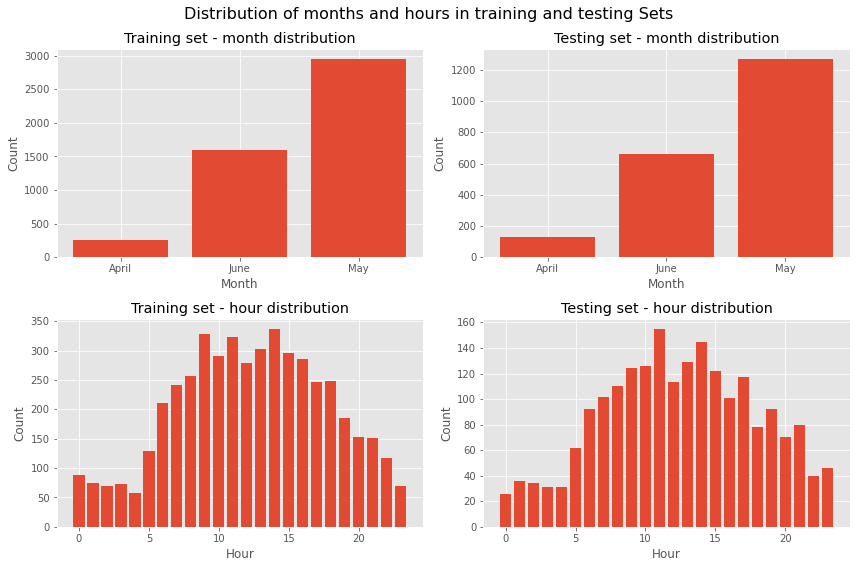

In [11]:
#Checking distribution of month and hour in the training and testing sets
train_month_distribution = X_train['Month'].value_counts().sort_index()
test_month_distribution = X_test['Month'].value_counts().sort_index()
train_hour_distribution = X_train['Hour'].value_counts().sort_index()
test_hour_distribution = X_test['Hour'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of months and hours in training and testing Sets", fontsize=16)

axes[0, 0].bar(train_month_distribution.index, train_month_distribution.values)
axes[0, 0].set_title("Training set - month distribution")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Count")

axes[0, 1].bar(test_month_distribution.index, test_month_distribution.values)
axes[0, 1].set_title("Testing set - month distribution")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Count")

axes[1, 0].bar(train_hour_distribution.index, train_hour_distribution.values)
axes[1, 0].set_title("Training set - hour distribution")
axes[1, 0].set_xlabel("Hour")
axes[1, 0].set_ylabel("Count")

axes[1, 1].bar(test_hour_distribution.index, test_hour_distribution.values)
axes[1, 1].set_title("Testing set - hour distribution")
axes[1, 1].set_xlabel("Hour")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.savefig('distribution_month_hour.png')
plt.show()

## Data pre-processing

In [12]:
X_train_1.dtypes

Interval                   datetime64[ns]
Zone_Id                            object
Temp                              float64
Weather                            object
Wind                              float64
Humidity                          float64
Barometer                         float64
Visibility                        float64
IsBankHoliday                        bool
IsSchoolHoliday                      bool
IsEventInZone                        bool
ProminentActivityInZone            object
Month                              object
Hour                                int64
DayOfWeek                          object
dtype: object

In [13]:
X_test.dtypes

Interval                   datetime64[ns]
Zone_Id                            object
Temp                              float64
Weather                            object
Wind                              float64
Humidity                          float64
Barometer                         float64
Visibility                        float64
IsBankHoliday                        bool
IsSchoolHoliday                      bool
IsEventInZone                        bool
ProminentActivityInZone            object
Month                              object
Hour                                int64
DayOfWeek                          object
dtype: object

### Performing one-hot encoding

We perform one-hot encoding to "Zone_Id", "Weather", "ProminentActivityInZone", "DayOfWeek", "Month". 

In [14]:
one_hot_encode_columns = ["Zone_Id", "Weather", "ProminentActivityInZone", "DayOfWeek", "Month"]

#Training set
X_train_encoded = pd.get_dummies(X_train_1, columns=one_hot_encode_columns)

#Testing set
X_test_encoded = pd.get_dummies(X_test, columns=one_hot_encode_columns)

In [15]:
X_train_encoded

,Interval,Temp,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,Hour,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_April,Month_June,Month_May
3660,2023-05-24 15:00:00,18.0,17.0,60.0,1027.0,16.000000,False,False,False,15,...,False,False,False,False,False,False,True,False,False,True
6416,2023-06-22 17:00:00,21.0,10.0,69.0,1022.0,6.234657,False,False,False,17,...,False,False,False,False,True,False,False,False,True,False
4907,2023-06-03 18:00:00,18.0,12.0,60.0,1021.0,6.234657,False,False,False,18,...,False,False,True,False,False,False,False,False,True,False
4088,2023-05-27 23:00:00,12.0,6.0,72.0,1023.0,6.234657,False,False,True,23,...,False,False,True,False,False,False,False,False,False,True
1112,2023-05-05 20:00:00,13.0,9.0,94.0,1011.0,8.000000,False,False,False,20,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2023-05-25 16:00:00,18.0,7.0,60.0,1029.0,6.234657,False,False,True,16,...,False,False,False,False,True,False,False,False,False,True
5191,2023-06-07 16:00:00,17.0,25.0,73.0,1017.0,16.000000,False,False,False,16,...,False,False,False,False,False,False,True,False,True,False
5226,2023-06-08 09:00:00,15.0,33.0,82.0,1013.0,8.000000,False,False,False,9,...,False,False,False,False,True,False,False,False,True,False
5390,2023-06-10 11:00:00,16.0,8.0,94.0,1012.0,3.000000,False,False,False,11,...,False,False,True,False,False,False,False,False,True,False


### Converting boolean variables to integers

In [16]:
boolean_columns = ['IsBankHoliday', 'IsSchoolHoliday', 'IsEventInZone']

#Training set
X_train_encoded[boolean_columns] = X_train_encoded[boolean_columns].astype(int)

#Testing set
X_test_encoded[boolean_columns] = X_test_encoded[boolean_columns].astype(int)

After all encoding, we rename the columns so we understand

In [17]:
X_train_encoded.rename(columns={
    'Zone_Id_Zone 1': 'ZoneId_Zone1',
    'Zone_Id_Zone 10': 'ZoneId_Zone10',
    'Zone_Id_Zone 2': 'ZoneId_Zone2',
    'Zone_Id_Zone 4': 'ZoneId_Zone4',
    'Zone_Id_Zone 5': 'ZoneId_Zone5',
    'Zone_Id_Zone 6': 'ZoneId_Zone6',
    'Zone_Id_Zone 7': 'ZoneId_Zone7',
    'Zone_Id_Zone 8': 'ZoneId_Zone8',
    'Zone_Id_Zone 9': 'ZoneId_Zone9',
    'Weather_Broken clouds': 'Weather_BrokenClouds',
    'Weather_Heavy rain': 'Weather_HeavyRain',
    'Weather_Light rain': 'Weather_LightRain',
    'Weather_Low clouds': 'Weather_LowClouds',
    'ProminentActivityInZone_Business Services': 'ProminentActivity_BusinessServices',
    'ProminentActivityInZone_Culture': 'ProminentActivity_Culture',
    'ProminentActivityInZone_Leisure / Activites': 'ProminentActivity_LeisureActivities',
    'ProminentActivityInZone_Restaurant / Cafe': 'ProminentActivity_RestaurantCafe',
    'ProminentActivityInZone_Specialist Retail': 'ProminentActivity_SpecialistRetail'
}, inplace=True)

X_train_encoded

,Interval,Temp,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,Hour,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_April,Month_June,Month_May
3660,2023-05-24 15:00:00,18.0,17.0,60.0,1027.0,16.000000,0,0,0,15,...,False,False,False,False,False,False,True,False,False,True
6416,2023-06-22 17:00:00,21.0,10.0,69.0,1022.0,6.234657,0,0,0,17,...,False,False,False,False,True,False,False,False,True,False
4907,2023-06-03 18:00:00,18.0,12.0,60.0,1021.0,6.234657,0,0,0,18,...,False,False,True,False,False,False,False,False,True,False
4088,2023-05-27 23:00:00,12.0,6.0,72.0,1023.0,6.234657,0,0,1,23,...,False,False,True,False,False,False,False,False,False,True
1112,2023-05-05 20:00:00,13.0,9.0,94.0,1011.0,8.000000,0,0,0,20,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2023-05-25 16:00:00,18.0,7.0,60.0,1029.0,6.234657,0,0,1,16,...,False,False,False,False,True,False,False,False,False,True
5191,2023-06-07 16:00:00,17.0,25.0,73.0,1017.0,16.000000,0,0,0,16,...,False,False,False,False,False,False,True,False,True,False
5226,2023-06-08 09:00:00,15.0,33.0,82.0,1013.0,8.000000,0,0,0,9,...,False,False,False,False,True,False,False,False,True,False
5390,2023-06-10 11:00:00,16.0,8.0,94.0,1012.0,3.000000,0,0,0,11,...,False,False,True,False,False,False,False,False,True,False


In [18]:
X_test_encoded.rename(columns={
    'Zone_Id_Zone 1': 'ZoneId_Zone1',
    'Zone_Id_Zone 10': 'ZoneId_Zone10',
    'Zone_Id_Zone 2': 'ZoneId_Zone2',
    'Zone_Id_Zone 4': 'ZoneId_Zone4',
    'Zone_Id_Zone 5': 'ZoneId_Zone5',
    'Zone_Id_Zone 6': 'ZoneId_Zone6',
    'Zone_Id_Zone 7': 'ZoneId_Zone7',
    'Zone_Id_Zone 8': 'ZoneId_Zone8',
    'Zone_Id_Zone 9': 'ZoneId_Zone9',
    'Weather_Broken clouds': 'Weather_BrokenClouds',
    'Weather_Heavy rain': 'Weather_HeavyRain',
    'Weather_Light rain': 'Weather_LightRain',
    'Weather_Low clouds': 'Weather_LowClouds',
    'ProminentActivityInZone_Business Services': 'ProminentActivity_BusinessServices',
    'ProminentActivityInZone_Culture': 'ProminentActivity_Culture',
    'ProminentActivityInZone_Leisure / Activites': 'ProminentActivity_LeisureActivities',
    'ProminentActivityInZone_Restaurant / Cafe': 'ProminentActivity_RestaurantCafe',
    'ProminentActivityInZone_Specialist Retail': 'ProminentActivity_SpecialistRetail'
}, inplace=True)

X_test_encoded

,Interval,Temp,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,Hour,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_April,Month_June,Month_May
1783,2023-05-10 02:00:00,11.0,12.0,94.0,1015.0,8.000000,0,0,1,2,...,False,False,False,False,False,False,True,False,False,True
6311,2023-06-21 16:00:00,19.0,14.0,78.0,1017.0,6.234657,0,0,0,16,...,False,False,False,False,False,False,True,False,True,False
496,2023-05-01 23:00:00,9.0,1.0,94.0,1023.0,6.234657,1,1,0,23,...,False,True,False,False,False,False,False,False,False,True
2168,2023-05-12 09:00:00,13.0,9.0,82.0,1023.0,6.234657,0,0,0,9,...,True,False,False,False,False,False,False,False,False,True
2275,2023-05-12 21:00:00,13.0,10.0,88.0,1025.0,6.234657,0,0,1,21,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,2023-05-24 04:00:00,10.0,5.0,88.0,1027.0,6.234657,0,0,0,4,...,False,False,False,False,False,False,True,False,False,True
2516,2023-05-14 14:00:00,13.0,8.0,94.0,1022.0,6.234657,0,0,0,14,...,False,False,False,True,False,False,False,False,False,True
3617,2023-05-24 10:00:00,17.0,12.0,68.0,1027.0,16.000000,0,0,1,10,...,False,False,False,False,False,False,True,False,False,True
1294,2023-05-07 18:00:00,14.0,10.0,88.0,1020.0,6.234657,0,0,1,18,...,False,False,False,True,False,False,False,False,False,True


In [19]:
#Converting the boolean values to numeric to run in the models whereby 1 is true and 0 is false 
X_train_encoded['ZoneId_Zone1'] = X_train_encoded['ZoneId_Zone1'].astype(int)
X_train_encoded['ZoneId_Zone10'] = X_train_encoded['ZoneId_Zone10'].astype(int)
X_train_encoded['ZoneId_Zone2'] = X_train_encoded['ZoneId_Zone2'].astype(int)
X_train_encoded['ZoneId_Zone4'] = X_train_encoded['ZoneId_Zone4'].astype(int)
X_train_encoded['ZoneId_Zone5'] = X_train_encoded['ZoneId_Zone5'].astype(int)
X_train_encoded['ZoneId_Zone6'] = X_train_encoded['ZoneId_Zone6'].astype(int)
X_train_encoded['ZoneId_Zone7'] = X_train_encoded['ZoneId_Zone7'].astype(int)
X_train_encoded['ZoneId_Zone8'] = X_train_encoded['ZoneId_Zone8'].astype(int)
X_train_encoded['ZoneId_Zone9'] = X_train_encoded['ZoneId_Zone9'].astype(int)
X_train_encoded['Weather_BrokenClouds'] = X_train_encoded['Weather_BrokenClouds'].astype(int)
X_train_encoded['Weather_Clear'] = X_train_encoded['Weather_Clear'].astype(int)
X_train_encoded['Weather_Cloudy'] = X_train_encoded['Weather_Cloudy'].astype(int)
X_train_encoded['Weather_Cool'] = X_train_encoded['Weather_Cool'].astype(int)
X_train_encoded['Weather_Fog'] = X_train_encoded['Weather_Fog'].astype(int)
X_train_encoded['Weather_HeavyRain'] = X_train_encoded['Weather_HeavyRain'].astype(int)
X_train_encoded['Weather_LightRain'] = X_train_encoded['Weather_LightRain'].astype(int)
X_train_encoded['Weather_LowClouds'] = X_train_encoded['Weather_LowClouds'].astype(int)
X_train_encoded['Weather_Mild'] = X_train_encoded['Weather_Mild'].astype(int)
X_train_encoded['Weather_Sunny'] = X_train_encoded['Weather_Sunny'].astype(int)
X_train_encoded['ProminentActivity_BusinessServices'] = X_train_encoded['ProminentActivity_BusinessServices'].astype(int)
X_train_encoded['ProminentActivity_Culture'] = X_train_encoded['ProminentActivity_Culture'].astype(int)
X_train_encoded['ProminentActivity_LeisureActivities'] = X_train_encoded['ProminentActivity_LeisureActivities'].astype(int)
X_train_encoded['ProminentActivity_RestaurantCafe'] = X_train_encoded['ProminentActivity_RestaurantCafe'].astype(int)
X_train_encoded['ProminentActivity_SpecialistRetail'] = X_train_encoded['ProminentActivity_SpecialistRetail'].astype(int)
X_train_encoded['DayOfWeek_Friday'] = X_train_encoded['DayOfWeek_Friday'].astype(int)
X_train_encoded['DayOfWeek_Monday'] = X_train_encoded['DayOfWeek_Monday'].astype(int)
X_train_encoded['DayOfWeek_Saturday'] = X_train_encoded['DayOfWeek_Saturday'].astype(int)
X_train_encoded['DayOfWeek_Sunday'] = X_train_encoded['DayOfWeek_Sunday'].astype(int)
X_train_encoded['DayOfWeek_Thursday'] = X_train_encoded['DayOfWeek_Thursday'].astype(int)
X_train_encoded['DayOfWeek_Tuesday'] = X_train_encoded['DayOfWeek_Tuesday'].astype(int)
X_train_encoded['DayOfWeek_Wednesday'] = X_train_encoded['DayOfWeek_Wednesday'].astype(int)
X_train_encoded['Month_April'] = X_train_encoded['Month_April'].astype(int)
X_train_encoded['Month_May'] = X_train_encoded['Month_May'].astype(int)
X_train_encoded['Month_June'] = X_train_encoded['Month_June'].astype(int)

In [20]:
#Converting the boolean values to numeric to run in the models whereby 1 is true and 0 is false 
X_test_encoded['ZoneId_Zone1'] = X_test_encoded['ZoneId_Zone1'].astype(int)
X_test_encoded['ZoneId_Zone10'] = X_test_encoded['ZoneId_Zone10'].astype(int)
X_test_encoded['ZoneId_Zone2'] = X_test_encoded['ZoneId_Zone2'].astype(int)
X_test_encoded['ZoneId_Zone4'] = X_test_encoded['ZoneId_Zone4'].astype(int)
X_test_encoded['ZoneId_Zone5'] = X_test_encoded['ZoneId_Zone5'].astype(int)
X_test_encoded['ZoneId_Zone6'] = X_test_encoded['ZoneId_Zone6'].astype(int)
X_test_encoded['ZoneId_Zone7'] = X_test_encoded['ZoneId_Zone7'].astype(int)
X_test_encoded['ZoneId_Zone8'] = X_test_encoded['ZoneId_Zone8'].astype(int)
X_test_encoded['ZoneId_Zone9'] = X_test_encoded['ZoneId_Zone9'].astype(int)
X_test_encoded['Weather_BrokenClouds'] = X_test_encoded['Weather_BrokenClouds'].astype(int)
X_test_encoded['Weather_Clear'] = X_test_encoded['Weather_Clear'].astype(int)
X_test_encoded['Weather_Cloudy'] = X_test_encoded['Weather_Cloudy'].astype(int)
X_test_encoded['Weather_Cool'] = X_test_encoded['Weather_Cool'].astype(int)
X_test_encoded['Weather_Fog'] = X_test_encoded['Weather_Fog'].astype(int)
X_test_encoded['Weather_HeavyRain'] = X_test_encoded['Weather_HeavyRain'].astype(int)
X_test_encoded['Weather_LightRain'] = X_test_encoded['Weather_LightRain'].astype(int)
X_test_encoded['Weather_LowClouds'] = X_test_encoded['Weather_LowClouds'].astype(int)
X_test_encoded['Weather_Mild'] = X_test_encoded['Weather_Mild'].astype(int)
X_test_encoded['Weather_Sunny'] = X_test_encoded['Weather_Sunny'].astype(int)
X_test_encoded['ProminentActivity_BusinessServices'] = X_test_encoded['ProminentActivity_BusinessServices'].astype(int)
X_test_encoded['ProminentActivity_Culture'] = X_test_encoded['ProminentActivity_Culture'].astype(int)
X_test_encoded['ProminentActivity_LeisureActivities'] = X_test_encoded['ProminentActivity_LeisureActivities'].astype(int)
X_test_encoded['ProminentActivity_RestaurantCafe'] = X_test_encoded['ProminentActivity_RestaurantCafe'].astype(int)
X_test_encoded['ProminentActivity_SpecialistRetail'] = X_test_encoded['ProminentActivity_SpecialistRetail'].astype(int)
X_test_encoded['DayOfWeek_Friday'] = X_test_encoded['DayOfWeek_Friday'].astype(int)
X_test_encoded['DayOfWeek_Monday'] = X_test_encoded['DayOfWeek_Monday'].astype(int)
X_test_encoded['DayOfWeek_Saturday'] = X_test_encoded['DayOfWeek_Saturday'].astype(int)
X_test_encoded['DayOfWeek_Sunday'] = X_test_encoded['DayOfWeek_Sunday'].astype(int)
X_test_encoded['DayOfWeek_Thursday'] = X_test_encoded['DayOfWeek_Thursday'].astype(int)
X_test_encoded['DayOfWeek_Tuesday'] = X_test_encoded['DayOfWeek_Tuesday'].astype(int)
X_test_encoded['DayOfWeek_Wednesday'] = X_test_encoded['DayOfWeek_Wednesday'].astype(int)
X_test_encoded['Month_April'] = X_test_encoded['Month_April'].astype(int)
X_test_encoded['Month_May'] = X_test_encoded['Month_May'].astype(int)
X_test_encoded['Month_June'] = X_test_encoded['Month_June'].astype(int)

In [21]:
X_train_encoded

,Interval,Temp,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,Hour,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_April,Month_June,Month_May
3660,2023-05-24 15:00:00,18.0,17.0,60.0,1027.0,16.000000,0,0,0,15,...,0,0,0,0,0,0,1,0,0,1
6416,2023-06-22 17:00:00,21.0,10.0,69.0,1022.0,6.234657,0,0,0,17,...,0,0,0,0,1,0,0,0,1,0
4907,2023-06-03 18:00:00,18.0,12.0,60.0,1021.0,6.234657,0,0,0,18,...,0,0,1,0,0,0,0,0,1,0
4088,2023-05-27 23:00:00,12.0,6.0,72.0,1023.0,6.234657,0,0,1,23,...,0,0,1,0,0,0,0,0,0,1
1112,2023-05-05 20:00:00,13.0,9.0,94.0,1011.0,8.000000,0,0,0,20,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2023-05-25 16:00:00,18.0,7.0,60.0,1029.0,6.234657,0,0,1,16,...,0,0,0,0,1,0,0,0,0,1
5191,2023-06-07 16:00:00,17.0,25.0,73.0,1017.0,16.000000,0,0,0,16,...,0,0,0,0,0,0,1,0,1,0
5226,2023-06-08 09:00:00,15.0,33.0,82.0,1013.0,8.000000,0,0,0,9,...,0,0,0,0,1,0,0,0,1,0
5390,2023-06-10 11:00:00,16.0,8.0,94.0,1012.0,3.000000,0,0,0,11,...,0,0,1,0,0,0,0,0,1,0


In [22]:
X_test_encoded

,Interval,Temp,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,Hour,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_April,Month_June,Month_May
1783,2023-05-10 02:00:00,11.0,12.0,94.0,1015.0,8.000000,0,0,1,2,...,0,0,0,0,0,0,1,0,0,1
6311,2023-06-21 16:00:00,19.0,14.0,78.0,1017.0,6.234657,0,0,0,16,...,0,0,0,0,0,0,1,0,1,0
496,2023-05-01 23:00:00,9.0,1.0,94.0,1023.0,6.234657,1,1,0,23,...,0,1,0,0,0,0,0,0,0,1
2168,2023-05-12 09:00:00,13.0,9.0,82.0,1023.0,6.234657,0,0,0,9,...,1,0,0,0,0,0,0,0,0,1
2275,2023-05-12 21:00:00,13.0,10.0,88.0,1025.0,6.234657,0,0,1,21,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,2023-05-24 04:00:00,10.0,5.0,88.0,1027.0,6.234657,0,0,0,4,...,0,0,0,0,0,0,1,0,0,1
2516,2023-05-14 14:00:00,13.0,8.0,94.0,1022.0,6.234657,0,0,0,14,...,0,0,0,1,0,0,0,0,0,1
3617,2023-05-24 10:00:00,17.0,12.0,68.0,1027.0,16.000000,0,0,1,10,...,0,0,0,0,0,0,1,0,0,1
1294,2023-05-07 18:00:00,14.0,10.0,88.0,1020.0,6.234657,0,0,1,18,...,0,0,0,1,0,0,0,0,0,1


In [23]:
X_train_encoded.dtypes

Interval                               datetime64[ns]
Temp                                          float64
Wind                                          float64
Humidity                                      float64
Barometer                                     float64
Visibility                                    float64
IsBankHoliday                                   int32
IsSchoolHoliday                                 int32
IsEventInZone                                   int32
Hour                                            int64
ZoneId_Zone1                                    int32
ZoneId_Zone10                                   int32
ZoneId_Zone2                                    int32
ZoneId_Zone4                                    int32
ZoneId_Zone5                                    int32
ZoneId_Zone6                                    int32
ZoneId_Zone7                                    int32
ZoneId_Zone8                                    int32
ZoneId_Zone9                

In [24]:
X_train_encoded.shape

(4811, 44)

### Feature Scaling

In [25]:
#Calculating the minimum and maximum of each value
min_vals = X_train_encoded[['Temp', 'Wind', 'Humidity', 'Barometer', 'Visibility']].min()
max_vals = X_train_encoded[['Temp', 'Wind', 'Humidity', 'Barometer', 'Visibility']].max()

#Calculating the range of each feature
range_vals = max_vals - min_vals

print("Range of each feature:\n", range_vals)

Range of each feature:
 Temp          17.0
Wind          32.0
Humidity      64.0
Barometer     23.0
Visibility    16.0
dtype: float64


(array([  68.,  302., 1121.,  611.,  835.,  833.,  390.,  451.,  123.,
          77.]),
 array([ 7. ,  8.7, 10.4, 12.1, 13.8, 15.5, 17.2, 18.9, 20.6, 22.3, 24. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Temperature')

(array([ 272., 1253., 1056.,  728.,  796.,  504.,   95.,   68.,    0.,
          39.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Wind')

(array([ 284.,  254.,  327.,  462.,  502.,  397., 1241.,  548.,  486.,
         310.]),
 array([1007. , 1009.3, 1011.6, 1013.9, 1016.2, 1018.5, 1020.8, 1023.1,
        1025.4, 1027.7, 1030. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Barometer')

(array([  21.,   32.,  119.,  411.,  405.,  913.,  502.,  548.,  550.,
        1310.]),
 array([ 36. ,  42.4,  48.8,  55.2,  61.6,  68. ,  74.4,  80.8,  87.2,
         93.6, 100. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Humidity')

(array([ 282.,  169.,   48., 3768.,   54.,  237.,    0.,    0.,    0.,
         253.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Visibility')

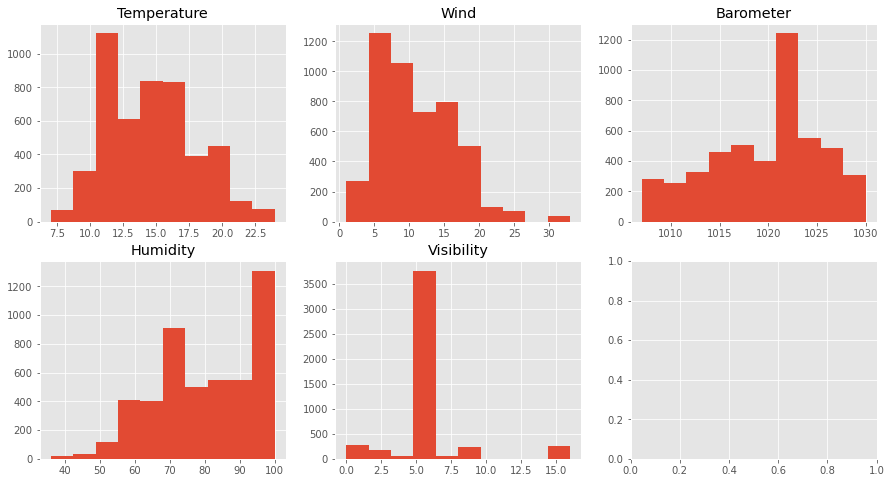

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].hist(X_train_encoded["Temp"])
axs[0, 0].set_title("Temperature")
axs[0, 1].hist(X_train_encoded["Wind"])
axs[0, 1].set_title("Wind")
axs[0, 2].hist(X_train_encoded["Barometer"])
axs[0, 2].set_title("Barometer")
axs[1, 0].hist(X_train_encoded["Humidity"])
axs[1, 0].set_title("Humidity")
axs[1, 1].hist(X_train_encoded["Visibility"])
axs[1, 1].set_title("Visibility")
plt.savefig('scaling_weather.png')
plt.show()

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1896671d490>,
 'caps': [<matplotlib.lines.Line2D at 0x1896671daf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1896671d1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1896671dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1896672d2e0>],
 'means': []}

Text(0.5, 0, 'Temp')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Box Plot of Temp')

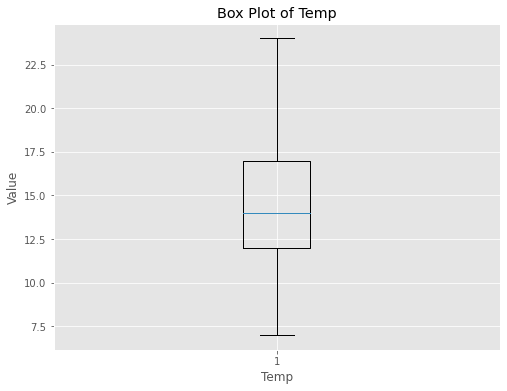

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x18966771c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1896678c670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1896677eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1896678cc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1896678cee0>],
 'means': []}

Text(0.5, 0, 'Wind')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Box Plot of Wind')

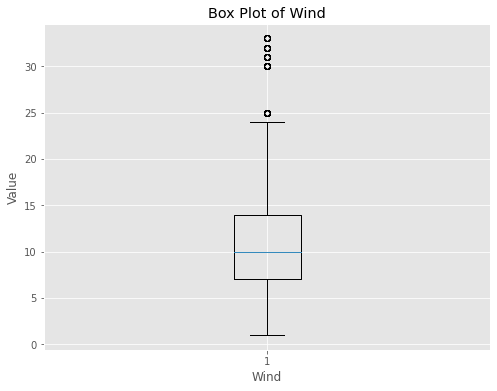

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x189667db790>,
 'caps': [<matplotlib.lines.Line2D at 0x189667fa1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x189667eba30>],
 'medians': [<matplotlib.lines.Line2D at 0x189667fa760>],
 'fliers': [<matplotlib.lines.Line2D at 0x189667faa30>],
 'means': []}

Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Box Plot of Humidity')

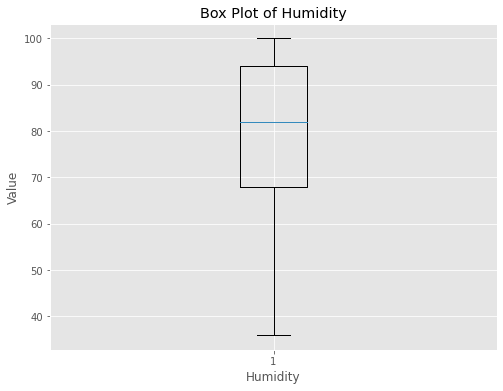

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1896684b280>,
 'caps': [<matplotlib.lines.Line2D at 0x18966856ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18966856550>],
 'medians': [<matplotlib.lines.Line2D at 0x18966864280>],
 'fliers': [<matplotlib.lines.Line2D at 0x18966864550>],
 'means': []}

Text(0.5, 0, 'Barometer')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Box Plot of Barometer')

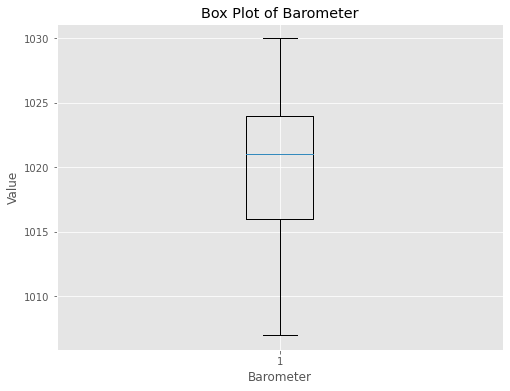

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x189668ac0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x189668baac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x189668ba370>],
 'medians': [<matplotlib.lines.Line2D at 0x189668c50a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x189668c5370>],
 'means': []}

Text(0.5, 0, 'Visibility')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Box Plot of Visibility')

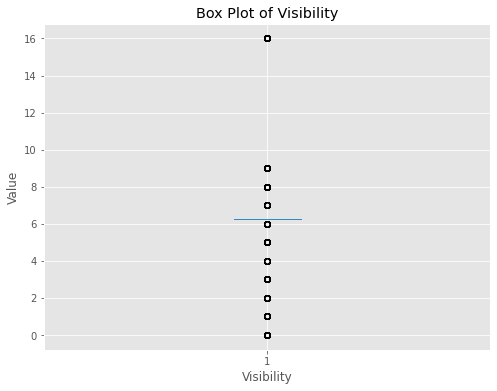

In [27]:
#Box plots
numerical_columns = ['Temp', 'Wind', 'Humidity', 'Barometer', 'Visibility']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(X_train_encoded[column].dropna())
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
    plt.show()

With there being outliers present in "Wind" and "Visibility" we will scale this feature using robust scaling as robust to outliers

In [28]:
#Using robust scaler
columns_to_scale = ['Temp', 'Humidity', 'Visibility', 'Barometer', 'Wind']

scaler = RobustScaler()
X_train_encoded[columns_to_scale] = scaler.fit_transform(X_train_encoded[columns_to_scale])
X_test_encoded[columns_to_scale] = scaler.transform(X_test_encoded[columns_to_scale])

In [29]:
X_train_encoded

,Interval,Temp,Wind,Humidity,Barometer,Visibility,IsBankHoliday,IsSchoolHoliday,IsEventInZone,Hour,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_April,Month_June,Month_May
3660,2023-05-24 15:00:00,0.8,1.000000,-0.846154,0.750,9.765343,0,0,0,15,...,0,0,0,0,0,0,1,0,0,1
6416,2023-06-22 17:00:00,1.4,0.000000,-0.500000,0.125,0.000000,0,0,0,17,...,0,0,0,0,1,0,0,0,1,0
4907,2023-06-03 18:00:00,0.8,0.285714,-0.846154,0.000,0.000000,0,0,0,18,...,0,0,1,0,0,0,0,0,1,0
4088,2023-05-27 23:00:00,-0.4,-0.571429,-0.384615,0.250,0.000000,0,0,1,23,...,0,0,1,0,0,0,0,0,0,1
1112,2023-05-05 20:00:00,-0.2,-0.142857,0.461538,-1.250,1.765343,0,0,0,20,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2023-05-25 16:00:00,0.8,-0.428571,-0.846154,1.000,0.000000,0,0,1,16,...,0,0,0,0,1,0,0,0,0,1
5191,2023-06-07 16:00:00,0.6,2.142857,-0.346154,-0.500,9.765343,0,0,0,16,...,0,0,0,0,0,0,1,0,1,0
5226,2023-06-08 09:00:00,0.2,3.285714,0.000000,-1.000,1.765343,0,0,0,9,...,0,0,0,0,1,0,0,0,1,0
5390,2023-06-10 11:00:00,0.4,-0.285714,0.461538,-1.125,-3.234657,0,0,0,11,...,0,0,1,0,0,0,0,0,1,0


## Scaling footfall

We normalised footfall by taking the total footfall for each zone and dividing each footfall observation/row with the total footfall in that zone, this eliminates the zones being of different sizes. 

**Normalising training set**

In [30]:
#Combining footfall from y_train with the zone_id columns from X_train_encoded 
footfall_train = pd.DataFrame({'Footfall': y_train})
X_train_zones = X_train_encoded[['ZoneId_Zone1', 'ZoneId_Zone10', 'ZoneId_Zone2', 'ZoneId_Zone4', 'ZoneId_Zone5', 'ZoneId_Zone6', 'ZoneId_Zone7', 'ZoneId_Zone8', 'ZoneId_Zone9']]
footfall_train = pd.concat([footfall_train, X_train_zones], axis=1)

In [31]:
#Total footfall for each zone in the training set
zone_footfall_train = footfall_train.groupby(X_train_zones.columns.tolist())['Footfall'].sum().reset_index()
zone_footfall_train.rename(columns={'Footfall': 'TotalFootfall'}, inplace=True)

In [32]:
zone_footfall_train

,ZoneId_Zone1,ZoneId_Zone10,ZoneId_Zone2,ZoneId_Zone4,ZoneId_Zone5,ZoneId_Zone6,ZoneId_Zone7,ZoneId_Zone8,ZoneId_Zone9,TotalFootfall
0,0,0,0,0,0,0,0,0,1,567
1,0,0,0,0,0,0,0,1,0,98
2,0,0,0,0,0,0,1,0,0,187
3,0,0,0,0,0,1,0,0,0,2326
4,0,0,0,0,1,0,0,0,0,308
5,0,0,0,1,0,0,0,0,0,188
6,0,0,1,0,0,0,0,0,0,164
7,0,1,0,0,0,0,0,0,0,2857
8,1,0,0,0,0,0,0,0,0,186


In [33]:
y_train

3660    1
6416    1
4907    2
4088    1
1112    2
       ..
3772    2
5191    1
5226    1
5390    1
860     2
Name: Footfall, Length: 4811, dtype: int64

In [34]:
#Map each row's zone to its corresponding total footfall 
y_train_with_zones = pd.merge(y_train, X_train_zones, left_index=True, right_index=True)
y_train_with_zones['ZoneId'] = y_train_with_zones[X_train_zones.columns.tolist()].apply(tuple, axis=1)

In [35]:
#Dictionary mapping ZoneId to TotalFootfall from zone_footfall_train
zone_footfall_dict = zone_footfall_train.set_index(X_train_zones.columns.tolist())['TotalFootfall'].to_dict()

In [36]:
#Map the ZoneId to TotalFootfall using the dictionary
y_train_with_zones['TotalFootfallInZone'] = y_train_with_zones['ZoneId'].map(zone_footfall_dict)

In [37]:
#Dividing the footfall in each row by the total footfall of its zone
y_train_with_zones['NormalisedFootfall'] = y_train_with_zones['Footfall'] / y_train_with_zones['TotalFootfallInZone']

In [38]:
# Extract the 'NormalisedFootfall' column as the final normalised footfall for y_train
y_train_normalised = y_train_with_zones['NormalisedFootfall']

In [39]:
y_train_normalised

3660    0.001764
6416    0.000350
4907    0.000860
4088    0.000350
1112    0.000700
          ...   
3772    0.000700
5191    0.000350
5226    0.000430
5390    0.000350
860     0.000860
Name: NormalisedFootfall, Length: 4811, dtype: float64

**Normalising testing set**

In [40]:
#Combining footfall from y_test with the zone_id columns from X_test_encoded
footfall_test = pd.DataFrame({'Footfall': y_test})
X_test_zones = X_test_encoded[['ZoneId_Zone1', 'ZoneId_Zone10', 'ZoneId_Zone2', 'ZoneId_Zone4', 'ZoneId_Zone5', 'ZoneId_Zone6', 'ZoneId_Zone7', 'ZoneId_Zone8', 'ZoneId_Zone9']]
footfall_test = pd.concat([footfall_test, X_test_zones], axis=1)

In [41]:
#Map each row's zone to its corresponding total footfall using the dictionary
y_test_with_zones = pd.merge(y_test, X_test_zones, left_index=True, right_index=True)
y_test_with_zones['ZoneId'] = y_test_with_zones[X_test_zones.columns.tolist()].apply(tuple, axis=1)

In [42]:
#Map the ZoneId to TotalFootfall using the dictionary
y_test_with_zones['TotalFootfallInZone'] = y_test_with_zones['ZoneId'].map(zone_footfall_dict)

In [43]:
#Divide the footfall in each row by the total footfall of its zone
y_test_with_zones['NormalisedFootfall'] = y_test_with_zones['Footfall'] / y_test_with_zones['TotalFootfallInZone']

In [44]:
#Extract the 'NormalisedFootfall' column as the final normalised footfall for y_test
y_test_normalised = y_test_with_zones['NormalisedFootfall']

In [45]:
y_test_normalised 

1783    0.000430
6311    0.001764
496     0.000430
2168    0.005319
2275    0.000430
          ...   
3571    0.006494
2516    0.005376
3617    0.000430
1294    0.000430
2840    0.005376
Name: NormalisedFootfall, Length: 2062, dtype: float64

## Models

Dropping "Interval" variables for train and test before running the models. 

In [46]:
X_train_encoded = X_train_encoded.drop("Interval", axis=1)
X_test_encoded = X_test_encoded.drop("Interval", axis=1)

## Random forest model

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [48]:
#Fitting model to training data
rf_model.fit(X_train_encoded, y_train_normalised)

RandomForestRegressor(random_state=42)

In [50]:
#Predictions on test data
y_pred_rfmodel_normalised = rf_model.predict(X_test_encoded)

In [51]:
#Reverse scaling
y_pred_rfmodel_actual = y_pred_rfmodel_normalised * y_test_with_zones['TotalFootfallInZone']
y_pred_rfmodel_actual

1783    1.000000
6311    1.000000
496     1.000000
2168    1.000000
2275    1.180707
          ...   
3571    2.040000
2516    1.000000
3617    1.318222
1294    1.177697
2840    1.000000
Name: TotalFootfallInZone, Length: 2062, dtype: float64

In [52]:
#Evaluate models performance
mse = mean_squared_error(y_test, y_pred_rfmodel_actual)
mae = mean_absolute_error(y_test, y_pred_rfmodel_actual)
mape_rf_model = 100 * np.mean(np.abs((y_test - y_pred_rfmodel_actual) / y_test))
r2 = r2_score(y_test, y_pred_rfmodel_actual)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n_samples - 1) / (n_samples - n_predictors - 1))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape_rf_model)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.059350659633646705
Mean Absolute Error (MAE): 0.09866890383699159
Mean Absolute Percentage Error (MAPE): 6.6626802050434
R-squared (R2): 0.9203017054664643
Adjusted R-squared: 0.9186034761974147


<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Unbalanced Footfall (Random Forest Model)')

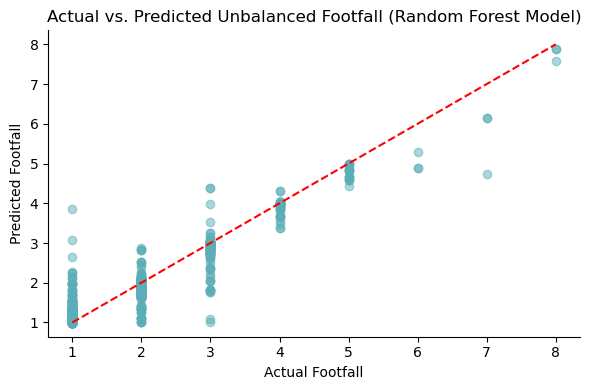

In [53]:
#Visualise
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rfmodel_actual, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Unbalanced Footfall (Random Forest Model)")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('actualvspredictedbasemodel_rf_unbalanced.png')
plt.show()

**Hyperparameter tuning for random forest model**

We use GridSearchCV for hyperparameter tuning to find the optimal hyperparameters for the random forest model

Cross validation: technique used to estimate the performance of a machine learning model on an independent dataset (test set) by partitioning the training data into multiple subsets (folds). The model is trained on some folds and evaluated on the remaining fold. This process is repeated multiple times, and the performance is averaged to obtain a more robust estimate of the model's performance.

In [55]:
random.seed(42)
np.random.seed(42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')

grid_search_rf.fit(X_train_encoded, y_train_normalised)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [56]:
best_params_rf

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

In [57]:
best_model_rf

RandomForestRegressor(n_estimators=150)

Performing cross validation for random forest model to provide a more robust estimate of the models performance.

In [58]:
#Perform cv on entire training dataset
cv_scores_rf = cross_val_score(best_model_rf, X_train_encoded, y_train_normalised, cv=5, scoring='r2')

mean_cv_score_rf = np.mean(cv_scores_rf)
std_cv_score_rf = np.std(cv_scores_rf)

print("Cross-validation R-squared scores:", cv_scores_rf)
print("Mean R-squared score:", mean_cv_score_rf)
print("Standard deviation of R-squared scores:", std_cv_score_rf)

Cross-validation R-squared scores: [0.98904684 0.98416661 0.94898255 0.98367217 0.97583655]
Mean R-squared score: 0.9763409433520414
Standard deviation of R-squared scores: 0.014318966598137823


Learning curve to check for overfitting or underfitting

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Training Samples')

Text(0, 0.5, 'R-squared (R2)')

Text(0.5, 1.0, 'Learning Curve Random Forest Model')

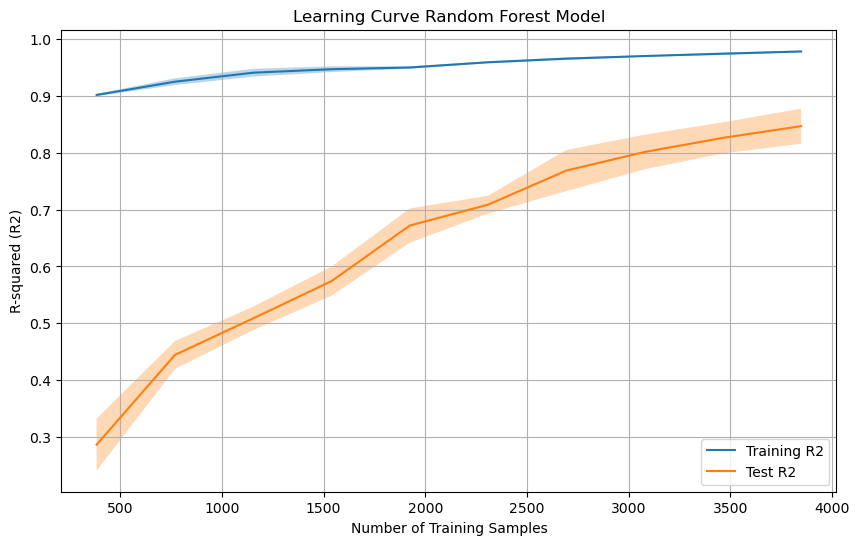

In [59]:
#Learning curve using the test set as the validation set
train_sizes, train_scores, test_scores = learning_curve(
    best_model_rf, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='r2', random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training R2')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Test R2')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Number of Training Samples')
plt.ylabel('R-squared (R2)')
plt.title('Learning Curve Random Forest Model')
plt.legend()
plt.grid()
plt.show()

In [60]:
#Predictions using the best model on the test data
y_pred_rfmodel_normalised_final = best_model_rf.predict(X_test_encoded)

#Reverse scale
y_pred_rfmodel_actual_final = y_pred_rfmodel_normalised_final * y_test_with_zones['TotalFootfallInZone']

#Evaluating model
mse_final_rf = mean_squared_error(y_test, y_pred_rfmodel_actual_final)
mae_final_rf = mean_absolute_error(y_test, y_pred_rfmodel_actual_final)
mape_final_rf = 100 * np.mean(np.abs((y_test - y_pred_rfmodel_actual_final) / y_test))
r2_final_rf = r2_score(y_test, y_pred_rfmodel_actual_final)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_final_rf = 1 - (1 - r2_final_rf) * ((n_samples - 1) / (n_samples - n_predictors - 1))

print("Final Mean Squared Error:", mse_final_rf)
print("Final Mean Absolute Error:", mae_final_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_final_rf)
print("Final R-squared:", r2_final_rf)
print("Adjusted R-squared:", adjusted_r2_final_rf)

Final Mean Squared Error: 0.0591124065186054
Final Mean Absolute Error: 0.09898173464088786
Mean Absolute Percentage Error (MAPE): 6.715870033060075
Final R-squared: 0.9206216406963894
Adjusted R-squared: 0.9189302286795137


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Footfall (Random Forest Model)')

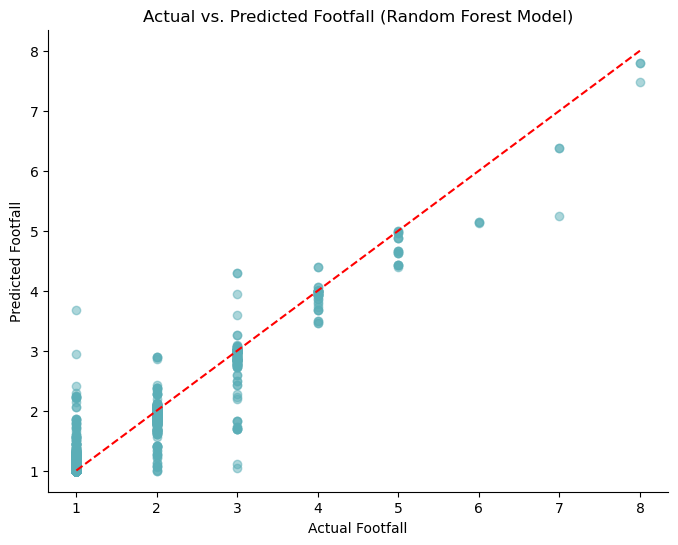

In [61]:
#Visualise
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rfmodel_actual_final, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Footfall (Random Forest Model)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## XG Boost - Gradient Boosting Machine

Building the basic model

In [61]:
#Call or start model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [62]:
#Train model
xgb_model.fit(X_train_encoded, y_train_normalised)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [65]:
#Mke predictions
y_pred_xgb_model_normalised = xgb_model.predict(X_test_encoded)

In [66]:
#Reverse scaling
y_pred_xgb_model_actual = y_pred_xgb_model_normalised * y_test_with_zones['TotalFootfallInZone']

In [67]:
#Evaluate model
mse_xgb_model = mean_squared_error(y_test, y_pred_xgb_model_actual)
mae_xgb_model = mean_absolute_error(y_test, y_pred_xgb_model_actual)
mape_xgb_model = 100 * np.mean(np.abs((y_test - y_pred_xgb_model_actual) / y_test))
r2_xgb_model = r2_score(y_test, y_pred_xgb_model_actual)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_xgb_model = 1 - (1 - r2_xgb_model) * ((n_samples - 1) / (n_samples - n_predictors - 1))

print("Mean Squared Error (MSE):", mse_xgb_model)
print("Mean Absolute Error (MAE):", mae_xgb_model)
print("Mean Absolute Percentage Error (MAPE):", mape_xgb_model)
print("R-squared (R2):", r2_xgb_model)
print("Adjusted R-squared:", adjusted_r2_xgb_model)

Mean Squared Error (MSE): 0.43143747318360365
Mean Absolute Error (MAE): 0.4285775947223604
Mean Absolute Percentage Error (MAPE): 29.165414259532092
R-squared (R2): 0.4206495593673568
Adjusted R-squared: 0.40830462926467903


<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Unbalanced Footfall (XGBoost Model)')

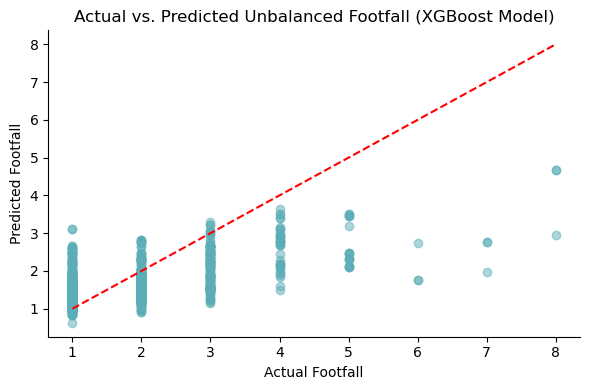

In [68]:
#Visualise
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_xgb_model_actual, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Unbalanced Footfall (XGBoost Model)")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('actualvspredictedbasemodel_xgb_unbalanced.png')
plt.show()

Hyperparameter tuning

In [69]:
#Grid search for hyperparameter tuning
random.seed(42)
np.random.seed(42)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')

grid_search_xgb.fit(X_train_encoded, y_train_normalised)

best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]},
             scoring='r2')

In [70]:
best_model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [71]:
best_params_xgb

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'subsample': 0.8}

Performing cross validation for XGBoost model to provide a more robust estimate of the models performance.

In [72]:
#Perform cv on entire training dataset
cv_scores_xgb = cross_val_score(best_model_xgb, X_train_encoded, y_train_normalised, cv=5, scoring='r2')

mean_cv_score_xgb = np.mean(cv_scores_xgb)
std_cv_score_xgb = np.std(cv_scores_xgb)

print("Cross-validation R-squared scores:", cv_scores_xgb)
print("Mean R-squared score:", mean_cv_score_xgb)
print("Standard deviation of R-squared scores:", std_cv_score_xgb)

Cross-validation R-squared scores: [0.96207546 0.96568352 0.93838225 0.96375277 0.96192699]
Mean R-squared score: 0.9583641975912837
Standard deviation of R-squared scores: 0.01008319870498774


Learning curve to check for overfitting or underfitting

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Training Samples')

Text(0, 0.5, 'R-squared (R2)')

Text(0.5, 1.0, 'Learning Curve XGBoost model')

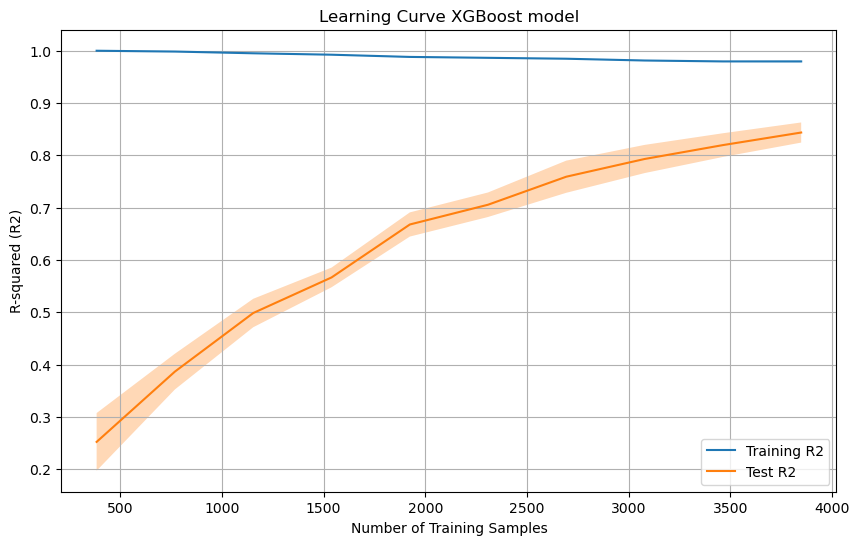

In [73]:
#Learning curve using the test set as the validation set
train_sizes, train_scores, test_scores = learning_curve(
    best_model_xgb, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='r2', random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training R2')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Test R2')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Number of Training Samples')
plt.ylabel('R-squared (R2)')
plt.title('Learning Curve XGBoost model')
plt.legend()
plt.grid()
plt.show()

They are converging and generalizing better as more data points are added, however, need more data so the gap becomes smaller

Training the final model for XGBoost

In [74]:
#Predictions on test data using best model for hyperparameter tuning 
y_pred_xgb_model_normalised_final = best_model_xgb.predict(X_test_encoded)

#Reverse scaling
y_pred_xgb_model_actual_final = y_pred_xgb_model_normalised_final * y_test_with_zones['TotalFootfallInZone']

#Evaluate model
mse_xgb_model_final = mean_squared_error(y_test, y_pred_xgb_model_actual_final)
mae_xgb_model_final = mean_absolute_error(y_test, y_pred_xgb_model_actual_final)
mape_xgb_model_final = 100 * np.mean(np.abs((y_test - y_pred_xgb_model_actual_final) / y_test))
r2_xgb_model_final = r2_score(y_test, y_pred_xgb_model_actual_final)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_xgb_model_final = 1 - (1 - r2_xgb_model_final) * ((n_samples - 1) / (n_samples - n_predictors - 1))


print("Mean Squared Error (MSE):", mse_xgb_model_final)
print("Mean Absolute Error (MAE):", mae_xgb_model_final)
print("Mean Absolute Percentage Error (MAPE):", mape_xgb_model_final)
print("R-squared (R2):", r2_xgb_model_final)
print("Adjusted R-squared:", adjusted_r2_xgb_model_final)

Mean Squared Error (MSE): 0.39785250422623486
Mean Absolute Error (MAE): 0.41170213443149933
Mean Absolute Percentage Error (MAPE): 27.829264480059695
R-squared (R2): 0.4657487168895521
Adjusted R-squared: 0.4543647698262472


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Footfall (XGBoost Model)')

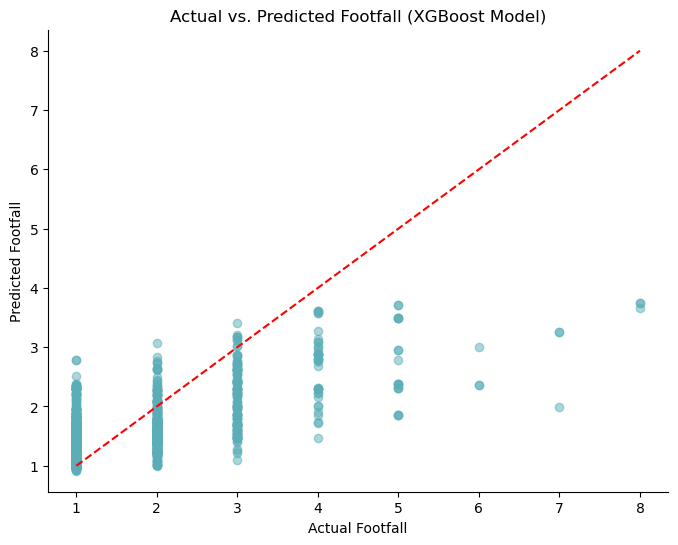

In [75]:
#Visualise
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_model_actual_final, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Footfall (XGBoost Model)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## Linear regression model

In [60]:
#Linear regression model
linear_model = LinearRegression()

linear_model.fit(X_train_encoded, y_train_normalised)

LinearRegression()

In [61]:
#Predictions on test data
y_pred_linear_model = linear_model.predict(X_test_encoded)

In [62]:
#Reverse scaling
y_pred_linear_model_actual = y_pred_linear_model * y_test_with_zones['TotalFootfallInZone']

In [63]:
#Evaluation metrics
mse_linear_model = mean_squared_error(y_test, y_pred_linear_model_actual)
mae_linear_model = mean_absolute_error(y_test, y_pred_linear_model_actual)
mape_linear_model = 100 * np.mean(np.abs((y_test - y_pred_linear_model_actual) / y_test))
r2_linear_model = r2_score(y_test, y_pred_linear_model_actual)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_linear_model = 1 - (1 - r2_linear_model) * ((n_samples - 1) / (n_samples - n_predictors - 1))

print("Mean Squared Error (MSE):", mse_linear_model)
print("Mean Absolute Error (MAE):", mae_linear_model)
print("Mean Absolute Percentage Error (MAPE):", mape_linear_model)
print("R-squared (R2):", r2_linear_model)
print("Adjusted R-squared:", adjusted_r2_linear_model)

Mean Squared Error (MSE): 0.6413688810159216
Mean Absolute Error (MAE): 0.5310372850987927
Mean Absolute Percentage Error (MAPE): 35.8825499412771
R-squared (R2): 0.13874578143908678
Adjusted R-squared: 0.12039398193555884


Regularisation technique in the aim of improving model performance (Lasso or L1 regularization) using GridSearchCV

In [80]:
#Finding optimal alpha to use in lasso 
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  
lasso_model = Lasso()

param_grid = {'alpha': alphas}

grid_search_lasso = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_encoded, y_train_normalised)

best_alpha_grid_lasso = grid_search_lasso.best_params_['alpha']
best_lasso_model_grid = Lasso(alpha=best_alpha_grid_lasso)

best_lasso_model_grid.fit(X_train_encoded, y_train_normalised)
y_pred_lasso_grid = best_lasso_model_grid.predict(X_test_encoded)

y_pred_lasso_grid_actual = y_pred_lasso_grid * y_test_with_zones['TotalFootfallInZone']

mse_lasso_grid = mean_squared_error(y_test, y_pred_lasso_grid_actual)
mae_lasso_grid = mean_absolute_error(y_test, y_pred_lasso_grid_actual)
mape_lasso_grid = 100 * np.mean(np.abs((y_test - y_pred_lasso_grid_actual) / y_test))
r2_lasso_grid = r2_score(y_test, y_pred_lasso_grid_actual)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_lasso_grid = 1 - (1 - r2_lasso_grid) * ((n_samples - 1) / (n_samples - n_predictors - 1))

print("Best alpha (Grid Search):", best_alpha_grid_lasso)
print("MSE with Grid Search:", mse_lasso_grid)
print("MAE withGrid Search:", mae_lasso_grid)
print("MAPE with Grid Search:", mape_lasso_grid)
print("R2 with Grid Search:", r2_lasso_grid)
print("Adjusted R-squared with Grid Search:", adjusted_r2_linear_model)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

Lasso(alpha=0.001)

Best alpha (Grid Search): 0.001
MSE with Grid Search: 8.148713380527052
MAE withGrid Search: 2.416318306273955
MAPE with Grid Search: 206.64744643491844
R2 with Grid Search: -9.942398333555044
Adjusted R-squared with Grid Search: 0.12039398193555884


Cross validation

In [81]:
#Perform cv on entire training dataset
cv_scores_linear_model = cross_val_score(linear_model, X_train_encoded, y_train_normalised, cv=5, scoring='r2')

mean_cv_score_linear_model = np.mean(cv_scores_linear_model)
std_cv_score_linear_model = np.std(cv_scores_linear_model)

print("Cross-validation R-squared scores:", cv_scores_linear_model)
print("Mean R-squared score:", mean_cv_score_linear_model)
print("Standard deviation of R-squared scores:", std_cv_score_linear_model)

Cross-validation R-squared scores: [0.88222874 0.91603613 0.8661385  0.89151708 0.90839088]
Mean R-squared score: 0.8928622670354992
Standard deviation of R-squared scores: 0.01792878643224068


Learning curve for linear regression model

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Training Samples')

Text(0, 0.5, 'R-squared (R2)')

Text(0.5, 1.0, 'Learning Curve Linear Regression model')

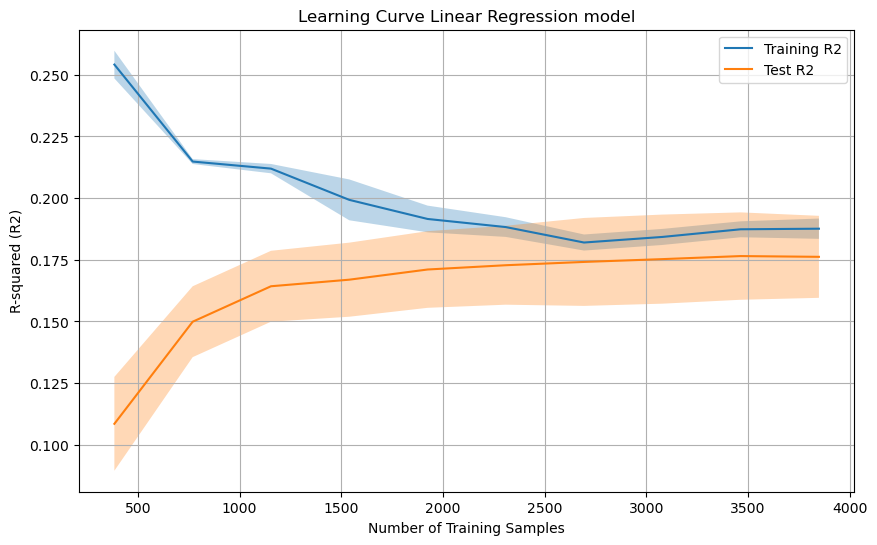

In [82]:
#Learning curve using the test set as the validation set
train_sizes, train_scores, test_scores = learning_curve(
    linear_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='r2', random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training R2')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Test R2')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Number of Training Samples')
plt.ylabel('R-squared (R2)')
plt.title('Learning Curve Linear Regression model')
plt.legend()
plt.grid()
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Footfall (Linear Regression Model)')

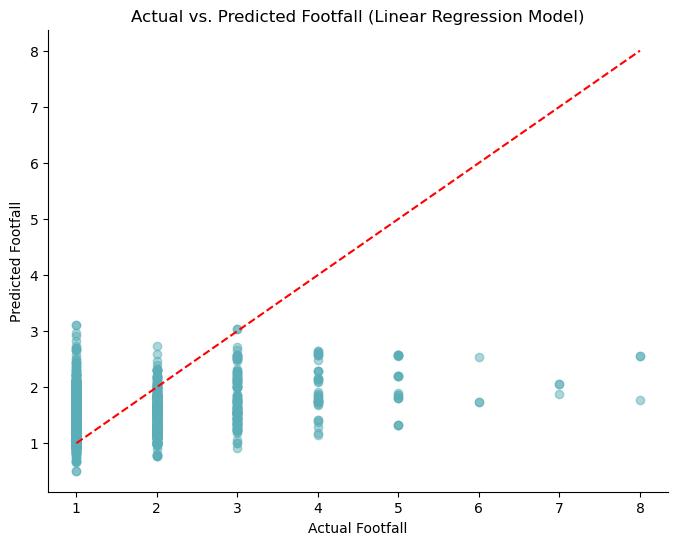

In [83]:
#Visualise
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear_model_actual, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Footfall (Linear Regression Model)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## Decision tree

In [55]:
dt_model = DecisionTreeRegressor(random_state=42)

#Fit model
dt_model.fit(X_train_encoded, y_train_normalised)

DecisionTreeRegressor(random_state=42)

In [56]:
#Predictions on test data
y_pred_dt_model = dt_model.predict(X_test_encoded)

In [57]:
#Reverse scaling
y_pred_dt_model_actual = y_pred_dt_model * y_test_with_zones['TotalFootfallInZone']

In [58]:
#Evaluation metrics
mse_dt_model = mean_squared_error(y_test, y_pred_dt_model_actual)
mae_dt_model = mean_absolute_error(y_test, y_pred_dt_model_actual)
mape_dt_model = 100 * np.mean(np.abs((y_test - y_pred_dt_model_actual) / y_test))
r2_dt_model = r2_score(y_test, y_pred_dt_model_actual)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_dt_model = 1 - (1 - r2_dt_model) * ((n_samples - 1) / (n_samples - n_predictors - 1))

print("Mean Squared Error (MSE):", mse_dt_model)
print("Mean Absolute Error (MAE):", mae_dt_model)
print("Mean Absolute Percentage Error (MAPE):", mape_dt_model)
print("R-squared (R2):", r2_dt_model)
print("Adjusted R-squared:", adjusted_r2_dt_model)

Mean Squared Error (MSE): 0.04152263181495578
Mean Absolute Error (MAE): 0.03368311963047717
Mean Absolute Percentage Error (MAPE): 2.238298666443367
R-squared (R2): 0.9442418507119704
Adjusted R-squared: 0.9430537434674782


<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Unbalanced Footfall (Decision Tree Model)')

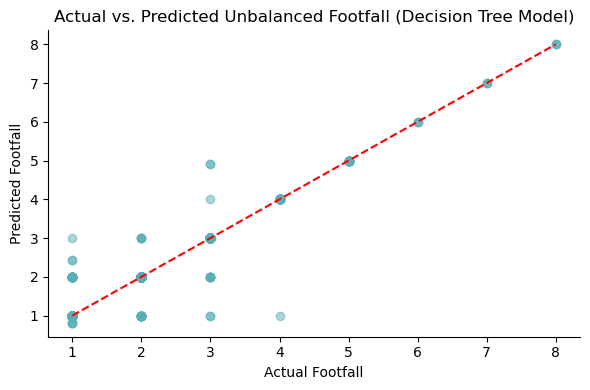

In [59]:
#Visualise
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_dt_model_actual, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Unbalanced Footfall (Decision Tree Model)")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('actualvspredictedbasemodel_dt_unbalanced.png')
plt.show()

Hyperparameter tuning

In [88]:
random.seed(42)
np.random.seed(42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='r2')

grid_search_dt.fit(X_train_encoded, y_train_normalised)

best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [89]:
best_params_dt

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Cross validation

In [90]:
#Perform cv on entire training dataset
cv_scores_dt = cross_val_score(best_model_dt, X_train_encoded, y_train_normalised, cv=5, scoring='r2')

mean_cv_score_dt = np.mean(cv_scores_dt)
std_cv_score_dt = np.std(cv_scores_dt)

print("Cross-validation R-squared scores:", cv_scores_dt)
print("Mean R-squared score:", mean_cv_score_dt)
print("Standard deviation of R-squared scores:", std_cv_score_dt)

Cross-validation R-squared scores: [0.99432322 0.98656175 0.95353486 0.97931478 0.98074927]
Mean R-squared score: 0.9788967739574256
Standard deviation of R-squared scores: 0.01373725096466024


Learning curve for decision tree

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Training Samples')

Text(0, 0.5, 'R-squared (R2)')

Text(0.5, 1.0, 'Learning Curve Decision tree')

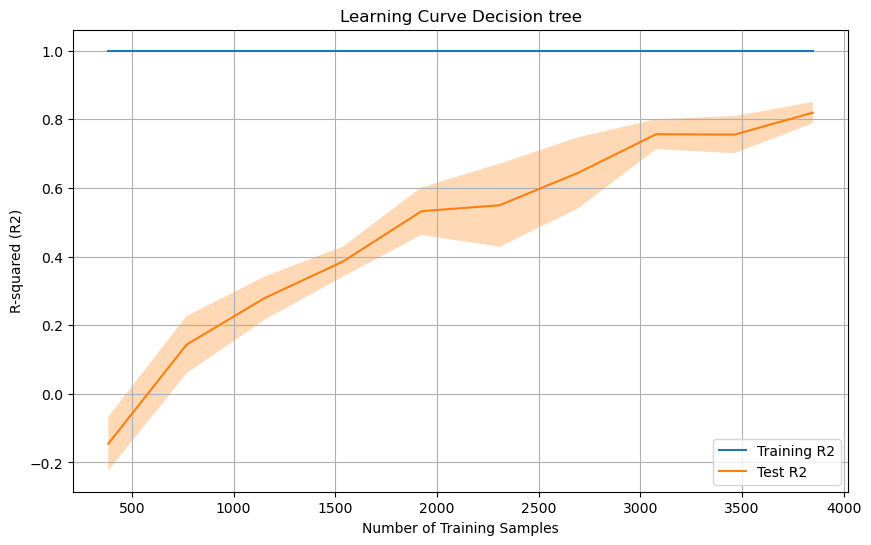

In [91]:
#Learning curve using the test set as the validation set
train_sizes, train_scores, test_scores = learning_curve(
    best_model_dt, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='r2', random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training R2')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Test R2')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Number of Training Samples')
plt.ylabel('R-squared (R2)')
plt.title('Learning Curve Decision tree')
plt.legend()
plt.grid()
plt.show()

In [92]:
#Predictions on test data using best model for hyperparameter tuning 
y_pred_dt_model_normalised_final = best_model_dt.predict(X_test_encoded)

#Reverse scaling
y_pred_dt_model_actual_final = y_pred_dt_model_normalised_final * y_test_with_zones['TotalFootfallInZone']

#Evaluate model
mse_dt_model_final = mean_squared_error(y_test, y_pred_dt_model_actual_final)
mae_dt_model_final = mean_absolute_error(y_test, y_pred_dt_model_actual_final)
mape_dt_model_final = 100 * np.mean(np.abs((y_test - y_pred_dt_model_actual_final) / y_test))
r2_dt_model_final = r2_score(y_test, y_pred_dt_model_actual_final)
n_samples = len(y_test)
n_predictors = X_train_encoded.shape[1]
adjusted_r2_dt_model_final = 1 - (1 - r2_dt_model_final) * ((n_samples - 1) / (n_samples - n_predictors - 1))


print("Mean Squared Error (MSE):", mse_dt_model_final)
print("Mean Absolute Error (MAE):", mae_dt_model_final)
print("Mean Absolute Percentage Error (MAPE):", mape_dt_model_final)
print("R-squared (R2):", r2_dt_model_final)
print("Adjusted R-squared:", adjusted_r2_dt_model_final)

Mean Squared Error (MSE): 0.04152263181495578
Mean Absolute Error (MAE): 0.03368311963047717
Mean Absolute Percentage Error (MAPE): 2.238298666443367
R-squared (R2): 0.9442418507119704
Adjusted R-squared: 0.9430537434674782


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Footfall')

Text(0, 0.5, 'Predicted Footfall')

Text(0.5, 1.0, 'Actual vs. Predicted Footfall (Decision Tree Model)')

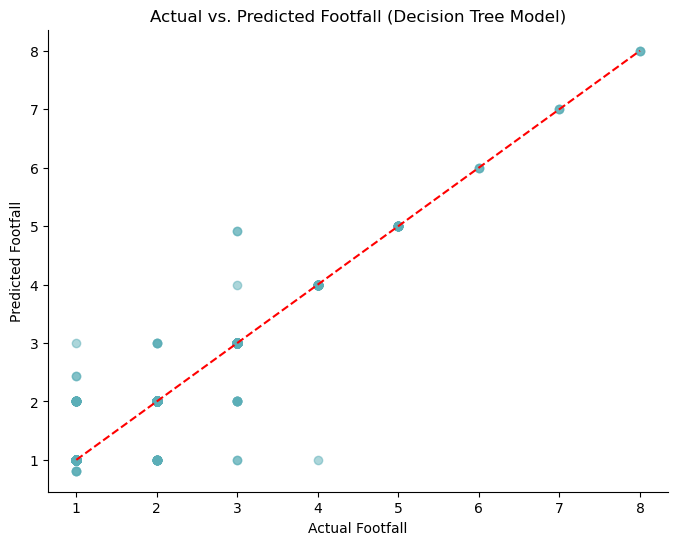

In [93]:
#Visualise
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt_model_actual_final, alpha=0.5, color='#5BAEB7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Footfall")
plt.ylabel("Predicted Footfall")
plt.title("Actual vs. Predicted Footfall (Decision Tree Model)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()